In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import joblib

# Load data
data = pd.read_csv('/content/drive/MyDrive/output1.csv', delimiter='\t', encoding="utf-8")


# Prediction example
#new_data = pd.DataFrame([[...]], columns=X.columns)  # Provide new data for prediction
#predicted_grade = model.predict(new_data)
#print("Predicted nutriscore_grade:", predicted_grade)

In [ ]:
import csv

# Open the CSV file
with open('/content/drive/MyDrive/output1.csv', mode='r', encoding="utf-8") as file:
    # Create a CSV reader object
    reader = csv.reader(file, delimiter='\t')
    next(reader)
    # Read the first row
    first_row = next(reader)

    # Print the first row
    print(first_row)


['d', '0', '8.2', '2.2', '0', '29', '22', '0', '5.1', '4.6', '1.84', '0', '0', '0', '0', '0', '0', '0', '0']


In [ ]:
# Convert character labels to numerical values
label_map = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}
data['nutriscore_grade'] = data['nutriscore_grade'].map(label_map)

# Preprocessing
X = data.iloc[:, 1:].fillna(0)  # Features: nutrition values, replacing NaN with 0
y = data['nutriscore_grade']    # Target variable


In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
# Model training
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)
print("Model trained")

Model trained


In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9035812672176309


In [ ]:

# Save the trained model to a file
joblib.dump(model, 'xgboost_model18.joblib')
print("Model saved successfully")

Model saved successfully


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

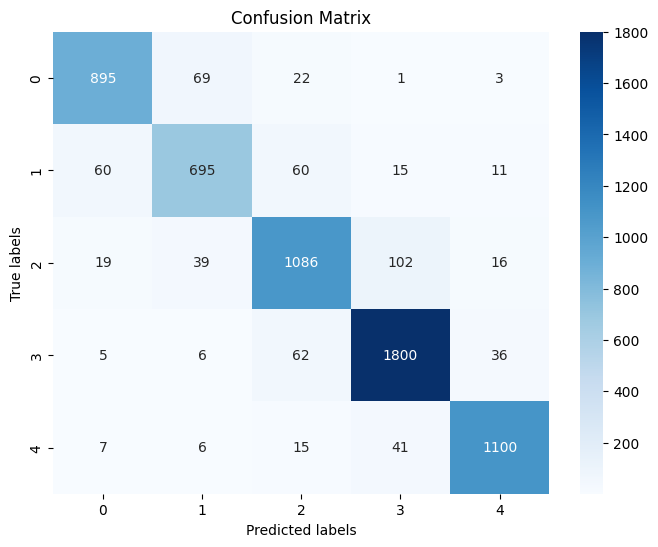

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix with blue colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

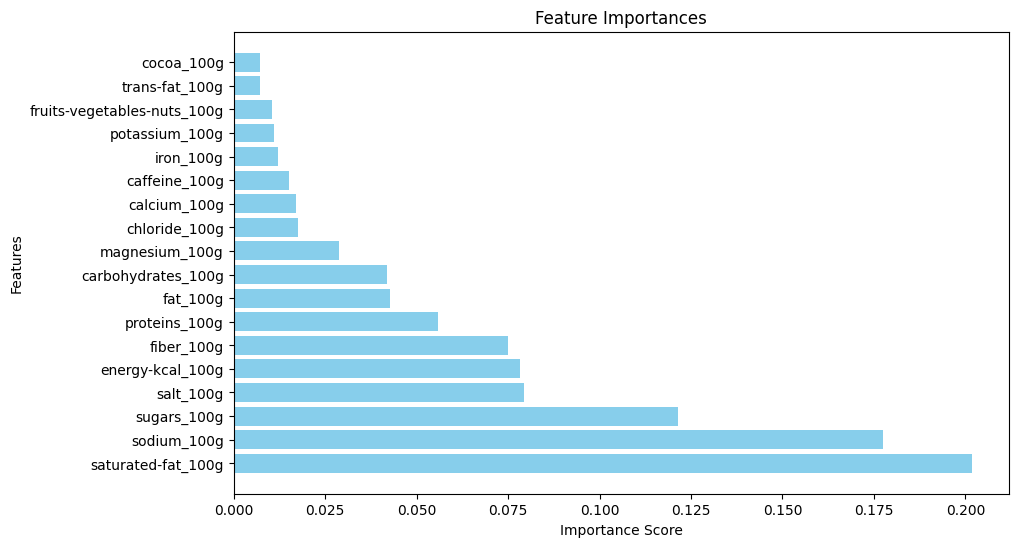

In [ ]:
# Feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
import json
import requests
import pandas as pd

def parse_nutrition(data, item):
    for key, value in data.items():
        if key == item:
            return value
        elif isinstance(value, dict):
            result = parse_nutrition(value, item)
            if result is not None:
                return result

    return None

barcode='8410076481597'
api_url='https://world.openfoodfacts.org/api/v3/product/'
url = api_url + barcode + '.json'
print(url)
# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON text from the webpage content
    json_text = response.text
    # Parse the JSON data
    parsed_data = json.loads(json_text)

    # Access the parent tag
    product_data0 = parsed_data['product']
    nutriments = parse_nutrition(product_data0, 'nutriments')
    if nutriments is not None:

        x1 = parse_nutrition(nutriments,'energy-kcal_100g') if parse_nutrition(nutriments, 'energy_100g') is not None else 0
        x2 = parse_nutrition(nutriments, 'fat_100g') if parse_nutrition(nutriments, 'fat_100g') is not None else 0
        x3 = parse_nutrition(nutriments,'saturated-fat_100g') if parse_nutrition(nutriments, 'saturated-fat_100g') is not None else 0
        x4 = parse_nutrition(nutriments,'cholesterol_100g') if parse_nutrition(nutriments, 'cholesterol_100g') is not None else 0
        x5 = parse_nutrition(nutriments,'carbohydrates_100g') if parse_nutrition(nutriments, 'carbohydrates_100g') is not None else 0
        x6 = parse_nutrition(nutriments,'sugars_100g') if parse_nutrition(nutriments, 'sugars_100g') is not None else 0
        x7 = parse_nutrition(nutriments,'fiber_100g') if parse_nutrition(nutriments, 'fiber_100g') is not None else 0
        x8= parse_nutrition(nutriments,'proteins_100g') if parse_nutrition(nutriments, 'proteins_100g') is not None else 0
        x9 = parse_nutrition(nutriments,'salt_100g') if parse_nutrition(nutriments, 'salt_100g') is not None else 0
        x10 = parse_nutrition(nutriments,'sodium_100g') if parse_nutrition(nutriments, 'sodium_100g') is not None else 0
        x11 = parse_nutrition(nutriments,'potassium_100g') if parse_nutrition(nutriments, 'potassium_100g') is not None else 0
        x12 = parse_nutrition(nutriments,'chloride_100g') if parse_nutrition(nutriments, 'chloride_100g') is not None else 0
        x13 = parse_nutrition(nutriments,'calcium_100g') if parse_nutrition(nutriments, 'calcium_100g') is not None else 0
        x14 = parse_nutrition(nutriments,'iron_100g') if parse_nutrition(nutriments, 'iron_100g') is not None else 0
        x15 = parse_nutrition(nutriments,'magnesium_100g') if parse_nutrition(nutriments, 'magnesium_100g') is not None else 0
        x16= parse_nutrition(nutriments,'caffeine_100g') if parse_nutrition(nutriments, 'caffeine_100g') is not None else 0
        x17 = parse_nutrition(nutriments,'fruits-vegetables-nuts_100g') if parse_nutrition(nutriments, 'fruits-vegetables-nuts_100g') is not None else 0
        x18 = parse_nutrition(nutriments,'cocoa_100g') if parse_nutrition(nutriments, 'cocoa_100g') is not None else 0

        example_data = [[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18]]
    else :
        print('nutriments not found')
        example_data = None
else:

    # Raise custom exception if the request failed
    raise Exception("Failed to fetch webpage. Status code:", response.status_code)
    example_data = None


print(example_data)


https://world.openfoodfacts.org/api/v3/product/8410076481597.json
[[492, 23.6, 2.2, 0, 59, 0.5, 6, 7.8, 0.49, 0.196, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
# Make predictions
predictions = model.predict(example_data)

# Print or use the predictions as needed
print(predictions)

[1]
